Month
1     33.161290
2     35.785714
3     41.193548
4     54.200000
5     62.000000
6     72.783333
7     81.532258
8     77.612903
9     72.066667
10    60.854839
11    44.600000
12    38.903226
Name: tavg, dtype: float64


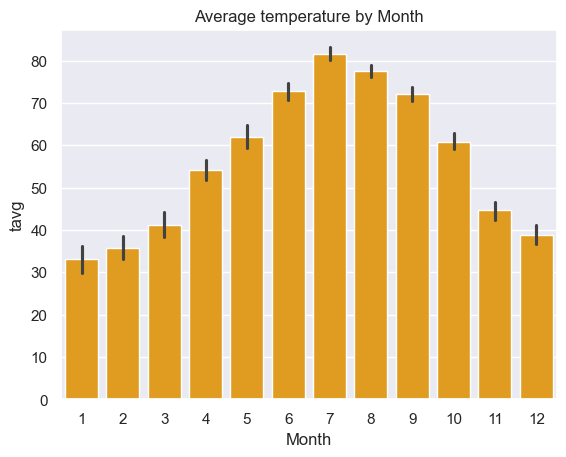

         date  tmax  tmin  tavg  departure  HDD  CDD precipitation new_snow  \
0      1/1/19    60    40  50.0       13.9   15    0          0.08        0   
1      2/1/19    41    35  38.0        2.1   27    0             0        0   
2      3/1/19    45    39  42.0        6.3   23    0             T        0   
3      4/1/19    47    37  42.0        6.5   23    0             0        0   
4      5/1/19    47    42  44.5        9.1   20    0          0.45        0   
..        ...   ...   ...   ...        ...  ...  ...           ...      ...   
360  27/12/19    54    42  48.0       10.8   17    0             T        0   
361  28/12/19    50    44  47.0       10.0   18    0             0        0   
362  29/12/19    44    38  41.0        4.3   24    0          0.29        0   
363  30/12/19    43    38  40.5        4.0   24    0          0.49        0   
364  31/12/19    46    38  42.0        5.7   23    0          0.01        0   

    snow_depth  Month  
0            0      1  
1  

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
weather_data=pd.read_csv('nyc_temperature.csv')
#getting used to with the data
weather_data.head()
weather_data.columns
#checking for any missing values
weather_data.isnull().sum()
#dropping the rows which consists of the missing values
weather_data.dropna()
#changing the data type of the date colum to "date time" for easy manipulation and plotting
# Extract the month from the 'date' column
weather_data['Month'] = pd.to_datetime(weather_data['date'], format='%d/%m/%y').dt.month

# Calculate the monthly average temperature using the 'tavg' column
monthly_avg_temp = weather_data.groupby('Month')['tavg'].mean()

# Display the result

print(monthly_avg_temp)


sns.set(style='darkgrid')
#Bar plot
sns.barplot(x='Month',y='tavg',data=weather_data,color='orange')
plt.title("Average temperature by Month")
plt.show()

hottest_day = weather_data.loc[weather_data['tmax'].idxmax()]
coldest_day = weather_data.loc[weather_data['tmin'].idxmin()]
print(weather_data)



In [18]:
#analysing the hottest and the coldest day
hottest_day = weather_data.loc[weather_data['tmax'].idxmax()]
coldest_day = weather_data.loc[weather_data['tmin'].idxmin()]
print(hottest_day)
print("--------------------------")
print(coldest_day)

date             21/7/19
tmax                 100
tmin                  83
tavg                91.5
departure           11.9
HDD                    0
CDD                   27
precipitation       0.01
new_snow               0
snow_depth             0
Month                  7
Name: 201, dtype: object
--------------------------
date             31/1/19
tmax                  17
tmin                   3
tavg                10.0
departure          -24.1
HDD                   55
CDD                    0
precipitation          0
new_snow               0
snow_depth             0
Month                  1
Name: 30, dtype: object


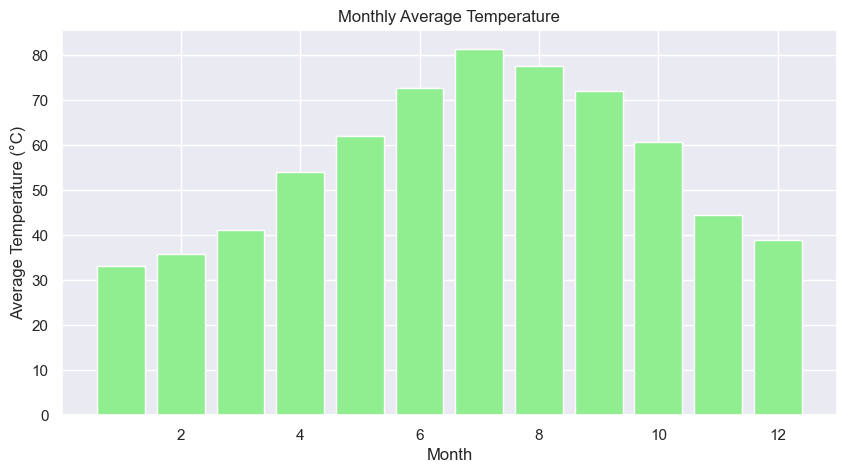

In [32]:

# Bar plot for monthly average temperature
plt.figure(figsize=(10, 5))
plt.bar(monthly_avg_temp.index, monthly_avg_temp.values, color='lightgreen')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.title('Monthly Average Temperature')
plt.show()



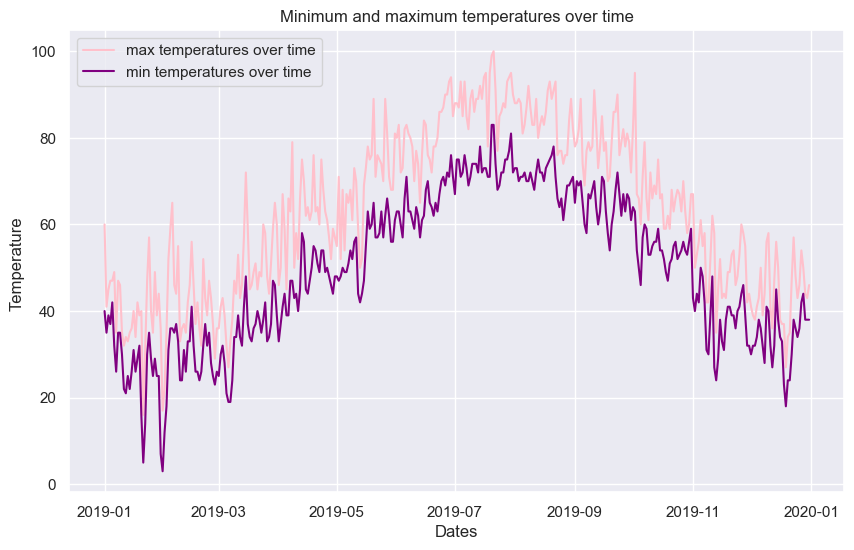

In [33]:
#plotting the maximum and minimum temperatures of Newyork over the period of time
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(weather_data['date'],weather_data['tmax'],label="max temperatures over time",color='pink')
plt.plot(weather_data['date'],weather_data['tmin'],label="min temperatures over time",color='purple')
plt.xlabel('Dates')
plt.ylabel('Temperature ')
plt.title("Minimum and maximum temperatures over time")
plt.legend()
plt.show()

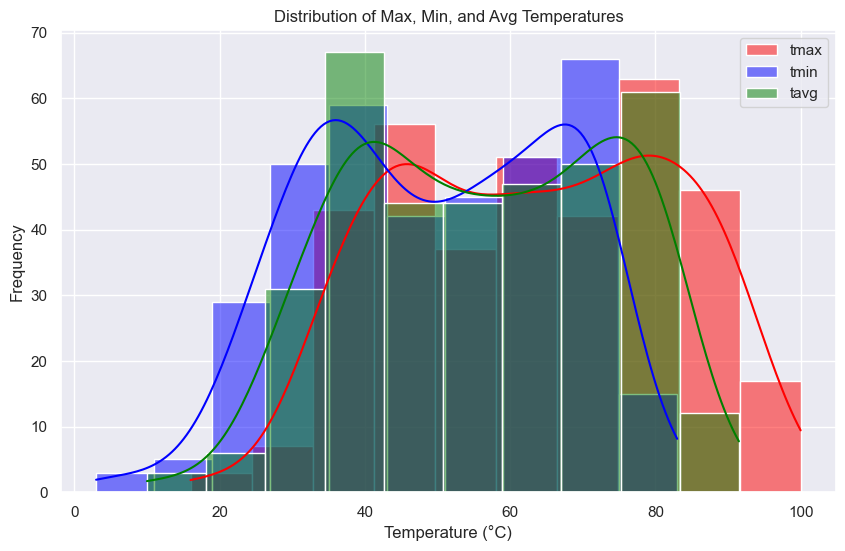

In [37]:
import seaborn as sns

# Plot the distribution of tmax, tmin, and tavg
plt.figure(figsize=(10, 6))
sns.histplot(weather_data['tmax'], color='red', label='tmax', kde=True)
sns.histplot(weather_data['tmin'], color='blue', label='tmin', kde=True)
sns.histplot(weather_data['tavg'], color='green', label='tavg', kde=True)
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Distribution of Max, Min, and Avg Temperatures')
plt.legend()
plt.show()
# This plot provides a visual comparison of the distributions of tmax, tmin, and tavg. It helps you understand:
# The range of values each temperature type typically falls within.
# How the distributions differ (e.g., tmax might be more skewed compared to tmin).
# The KDE lines show the overall shape and spread of the temperature data more clearly than the histograms alone.







     tmax  tmin  tavg  precipitation  new_snow  snow_depth
0      60    40  50.0           0.08       0.0         0.0
1      41    35  38.0           0.00       0.0         0.0
2      45    39  42.0            NaN       0.0         0.0
3      47    37  42.0           0.00       0.0         0.0
4      47    42  44.5           0.45       0.0         0.0
..    ...   ...   ...            ...       ...         ...
360    54    42  48.0            NaN       0.0         0.0
361    50    44  47.0           0.00       0.0         0.0
362    44    38  41.0           0.29       0.0         0.0
363    43    38  40.5           0.49       0.0         0.0
364    46    38  42.0           0.01       0.0         0.0

[365 rows x 6 columns]


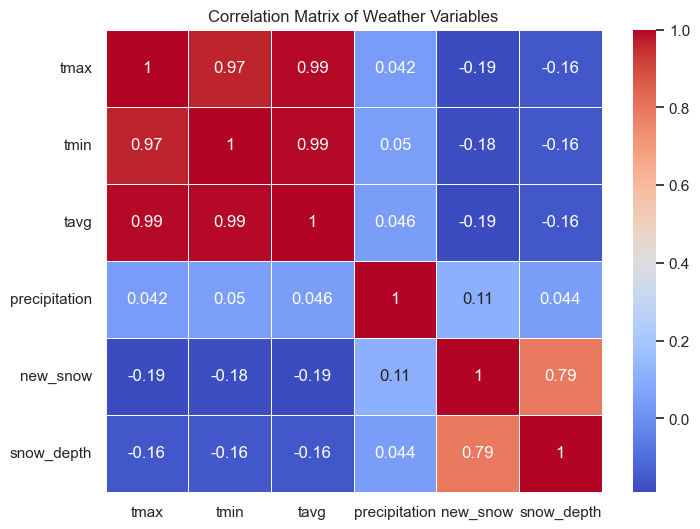

In [40]:
# Correlation measures how closely two variables move in relation to each other. It returns values between -1 and 1:
#1: Perfect positive correlation (as one variable increases, the other also increases).
#-1: Perfect negative correlation (as one variable increases, the other decreases).
#0: No correlation (the variables don't influence each other).

#Red cells indicate a positive correlation (as one variable increases, the other tends to increase).
# Blue cells indicate a negative correlation (as one variable increases, the other tends to decrease).
# The intensity of the color represents the strength of the correlation: darker colors show stronger correlations.
# Calculate the correlation matrix# Identify non-numeric values
print(weather_data[['tmax', 'tmin', 'tavg', 'precipitation', 'new_snow', 'snow_depth']].apply(pd.to_numeric, errors='coerce'))

# Replace non-numeric values with NaN using pd.to_numeric
weather_data['tmax'] = pd.to_numeric(weather_data['tmax'], errors='coerce')
weather_data['tmin'] = pd.to_numeric(weather_data['tmin'], errors='coerce')
weather_data['tavg'] = pd.to_numeric(weather_data['tavg'], errors='coerce')
weather_data['precipitation'] = pd.to_numeric(weather_data['precipitation'], errors='coerce')
weather_data['new_snow'] = pd.to_numeric(weather_data['new_snow'], errors='coerce')
weather_data['snow_depth'] = pd.to_numeric(weather_data['snow_depth'], errors='coerce')

# Drop rows with missing values (if any were created)
weather_data.dropna(subset=['tmax', 'tmin', 'tavg', 'precipitation', 'new_snow', 'snow_depth'], inplace=True)

# Now, calculate the correlation matrix and plot the heatmap again
corr_matrix = weather_data[['tmax', 'tmin', 'tavg', 'precipitation', 'new_snow', 'snow_depth']].corr()

# Plot a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Weather Variables')
plt.show()
#summary
#Temperature correlations (tmax, tmin, tavg) are very strong, as expected.
#Precipitation has weak or no significant correlations with the temperature variables.
#Snow variables (new_snow and snow_depth) have a strong positive correlation, with weak negative correlations with temperature.

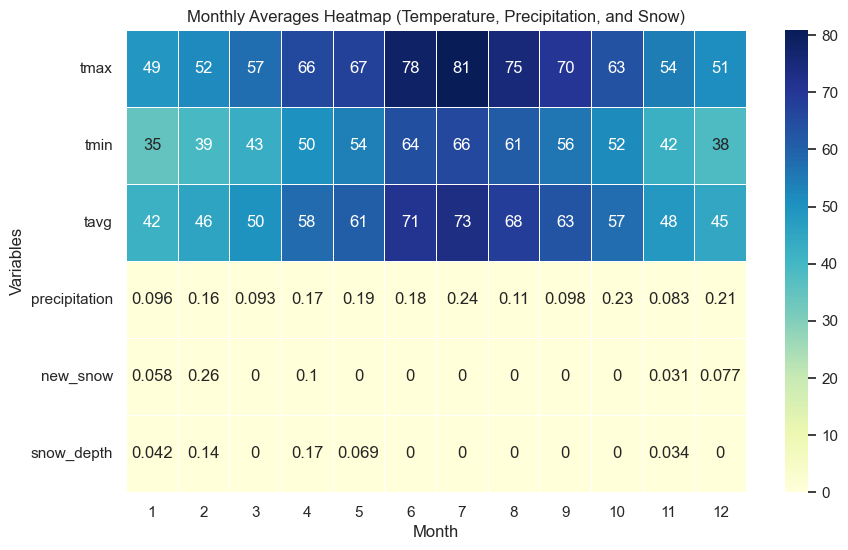

In [43]:
#This heatmap gives a clear visual overview of the monthly weather trends, showing how temperature, precipitation, and snow accumulation fluctuate
#over the year. It’s useful for identifying seasonal patterns, such as the hottest and coldest months, the timing of snow, and precipitation levels 
#throughout the year.
# Yellow represents higher values,
# Green represents moderate values,
# Blue represents lower values.
# Group by month and calculate the monthly averages for all relevant columns

# Convert the 'date' column to datetime if not already in datetime format
weather_data['date'] = pd.to_datetime(weather_data['date'])

# Now you can use the .dt accessor
weather_data['Month'] = weather_data['date'].dt.month
monthly_avg_all = weather_data.groupby(weather_data['date'].dt.month)[['tmax', 'tmin', 'tavg', 'precipitation', 'new_snow', 'snow_depth']].mean()

# Plot a heatmap using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(monthly_avg_all.T, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Monthly Averages Heatmap (Temperature, Precipitation, and Snow)')
plt.xlabel('Month')
plt.ylabel('Variables')
plt.show()
# insights
# How the maximum, minimum, and average temperatures fluctuate over the months.
# How precipitation, snow depth, and new snowfall vary throughout the year.
# The color intensity can help identify seasonal trends, such as colder temperatures in winter months and higher temperatures in summer months.
